<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/time_series/Time_Series_EDA_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Pandas data reader

In [1]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

In [3]:
yf.pdr_override()

In [4]:
import os
import pandas_datareader as pdr
import pandas_datareader.data as web

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from datetime import datetime,timedelta

In [12]:
df_tsla = web.DataReader(['TSLA'], start='2017-02-27', end='2023-05-06')

df_tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [10]:
# Simple moving average
# Cumulative Moving Average
# EWMA (Exponential weight moving Average)
# Moving Average (Formula) - ACF (Autocorelation Plot)
# Autoregressive Model - PACF

Simple Moving Average

In [13]:
df_tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000


In [14]:
df_tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1.559000e+03
mean,119.086842,121.819680,116.088069,119.017718,119.017718,1.292119e+08
std,113.540328,116.141208,110.593204,113.382562,113.382562,8.441731e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.989000,21.285999,20.635000,21.019667,21.019667,7.541025e+07
50%,49.174000,51.518002,47.480667,49.871334,49.871334,1.027710e+08
75%,222.565002,226.990005,216.315002,221.510002,221.510002,1.520070e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [18]:
df_tsla['Open'].rolling(5).mean().head(20) # Simple moving Agerage

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03    16.626533
2017-03-06    16.623066
2017-03-07    16.726133
2017-03-08    16.630400
2017-03-09    16.602666
2017-03-10    16.542266
2017-03-13    16.501067
2017-03-14    16.423600
2017-03-15    16.556933
2017-03-16    16.753867
2017-03-17    16.991067
2017-03-20    17.201467
2017-03-21    17.424400
2017-03-22    17.351867
2017-03-23    17.258400
2017-03-24    17.147733
Name: Open, dtype: float64

<Axes: xlabel='Date'>

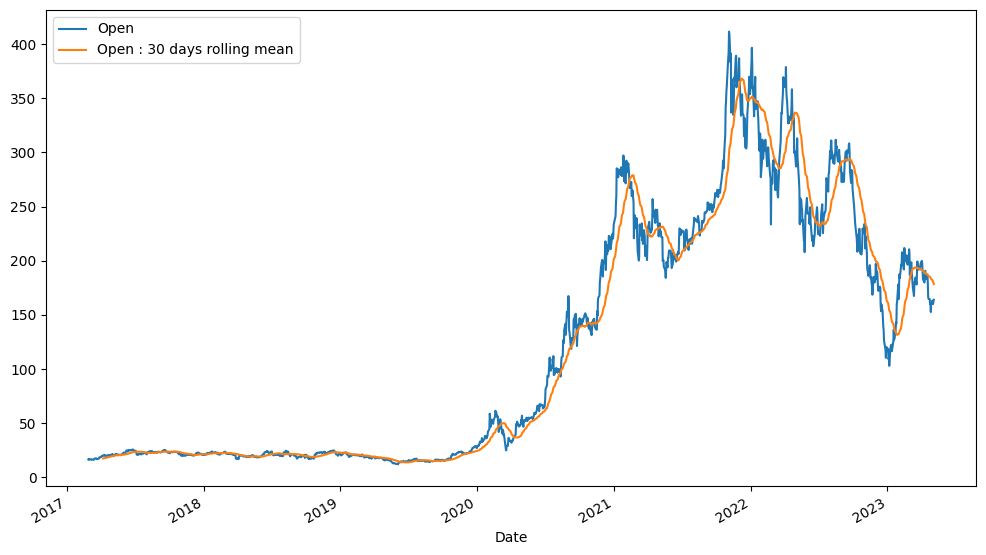

In [22]:
df_tsla['Open : 30 days rolling mean'] = df_tsla['Open'].rolling(30).mean()
df_tsla[['Open','Open : 30 days rolling mean']].plot(figsize=(12,7))

In [23]:
df_tsla['Open'].rolling(5).mean().head(10)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03    16.626533
2017-03-06    16.623066
2017-03-07    16.726133
2017-03-08    16.630400
2017-03-09    16.602666
2017-03-10    16.542266
Name: Open, dtype: float64

<Axes: xlabel='Date'>

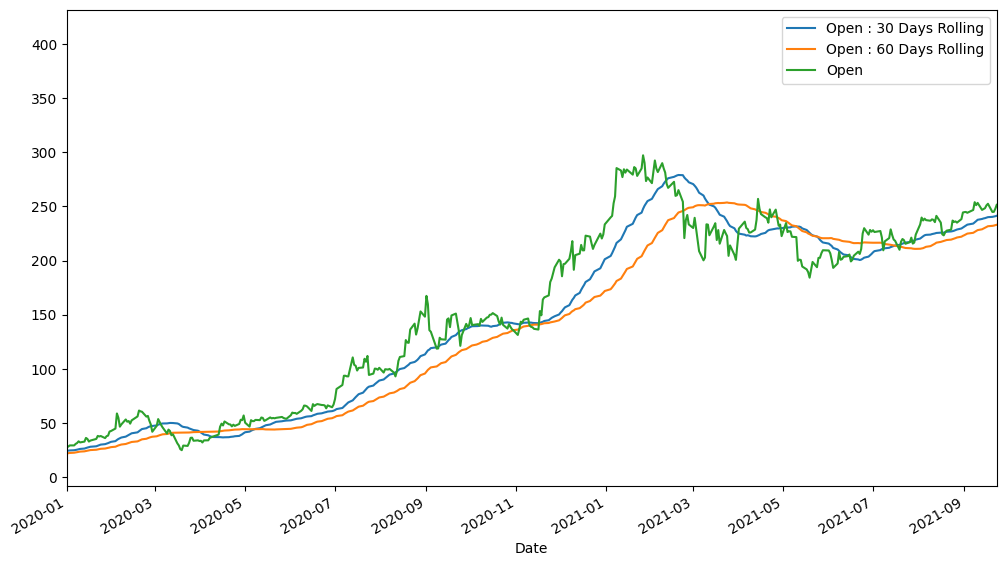

In [32]:
df_tsla['Open : 30 Days Rolling'] = df_tsla['Open'].rolling(30,min_periods=1).mean() # min_periods -> minumum elements required in aggregate
df_tsla['Open : 60 Days Rolling'] = df_tsla['Open'].rolling(60,min_periods=1).mean()
df_tsla[['Open : 30 Days Rolling','Open : 60 Days Rolling','Open']].plot(xlim=['2020-01-01','2021-09-23'],figsize=(12,7))

<Axes: xlabel='Date'>

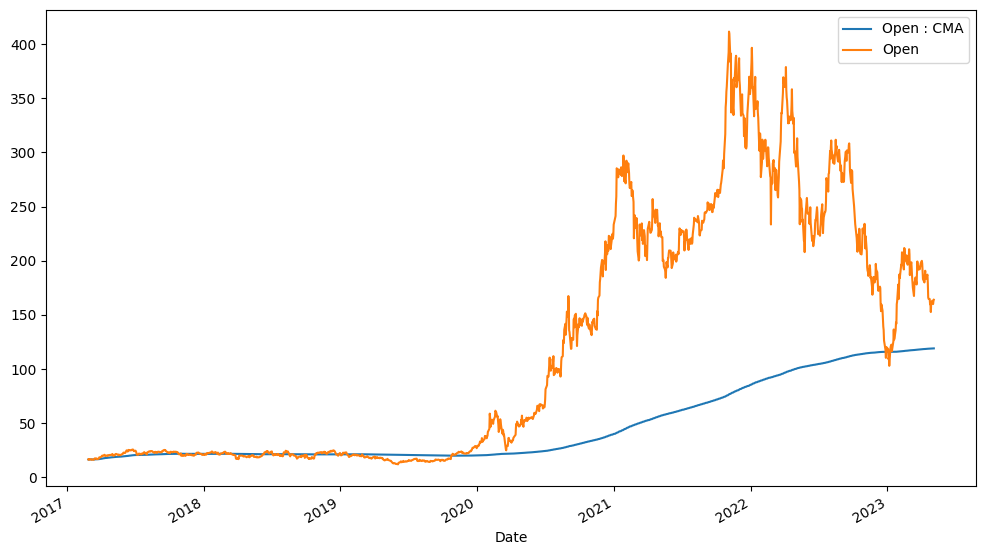

In [35]:
#Expending
# CMA Cumulative Moving Average
df_tsla['Open : CMA'] = df_tsla['Open'].expanding().mean() # min_periods -> minumum elements required in aggregate
df_tsla[['Open : CMA','Open']].plot(figsize=(12,7))

In [36]:
df_tsla[['Open : CMA','Open']].head() # even first element will have value

,Open : CMA,Open
Date,,
2017-02-27,16.544666,16.544666
2017-02-28,16.412000,16.279333
2017-03-01,16.589778,16.945333
2017-03-02,16.604167,16.647333
2017-03-03,16.626533,16.716000


In [37]:
# Exponential moving Avg
df_tsla['EMA_0.1'] = df_tsla['Open'].ewm(alpha=0.1,adjust=False).mean()
df_tsla[['Open','EMA_0.1']].head(20)

,Open,EMA_0.1
Date,,
2017-02-27,16.544666,16.544666
2017-02-28,16.279333,16.518133
2017-03-01,16.945333,16.560853
2017-03-02,16.647333,16.569501
2017-03-03,16.716000,16.584151
2017-03-06,16.527332,16.578469
2017-03-07,16.794666,16.600089
2017-03-08,16.466667,16.586747
2017-03-09,16.508667,16.578939


<Axes: xlabel='Date'>

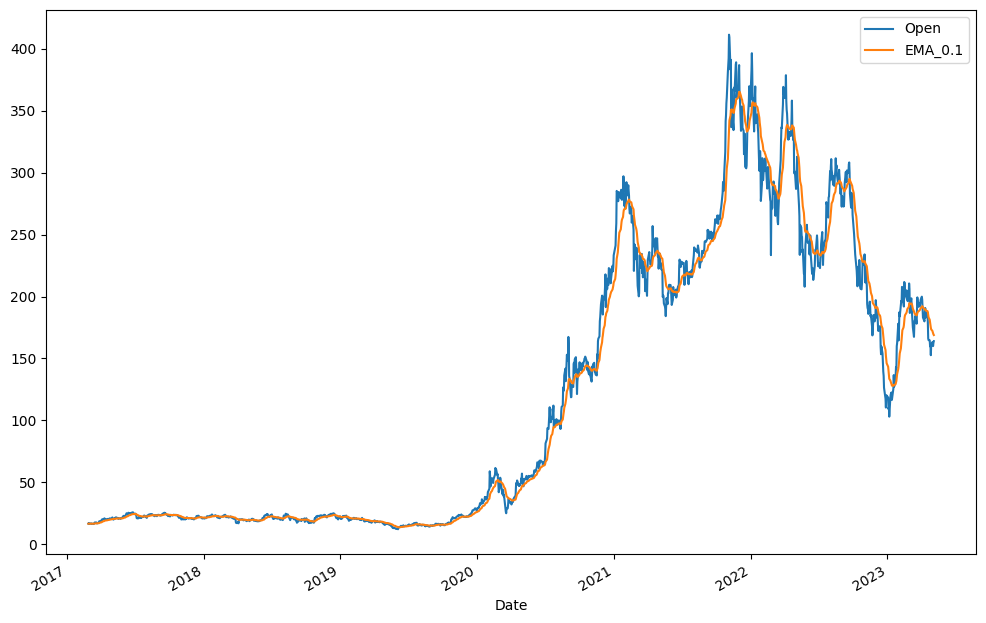

In [39]:
df_tsla[['Open','EMA_0.1']].plot(figsize=(12,8))

In [41]:
# Exponential Weighted moving Avg
df_tsla['EWMA_5'] = df_tsla['Open'].ewm(span=5).mean()
df_tsla[['Open','EMA_0.1','EWMA_5']].head(20)

,Open,EMA_0.1,EWMA_5
Date,,,
2017-02-27,16.544666,16.544666,16.544666
2017-02-28,16.279333,16.518133,16.385466
2017-03-01,16.945333,16.560853,16.650667
2017-03-02,16.647333,16.569501,16.649282
2017-03-03,16.716000,16.584151,16.674894
2017-03-06,16.527332,16.578469,16.620973
2017-03-07,16.794666,16.600089,16.682470
2017-03-08,16.466667,16.586747,16.607615
2017-03-09,16.508667,16.578939,16.573751


<Axes: xlabel='Date'>

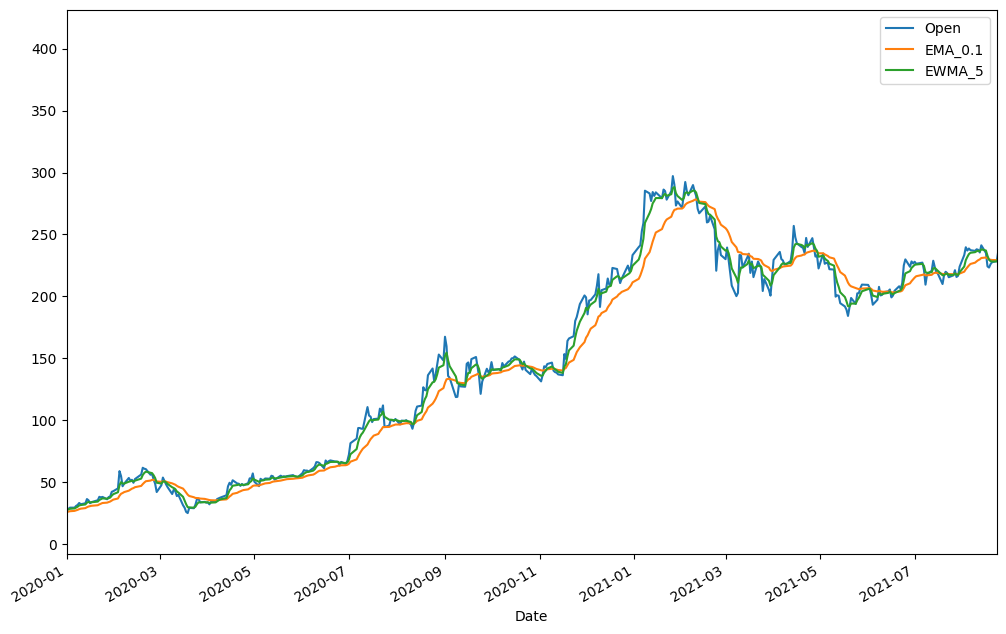

In [43]:
df_tsla[['Open','EMA_0.1','EWMA_5']].plot(xlim=['2020-01-01','2021-08-23'],figsize=(12,8))